In [1]:
import pandas as pd
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv"

df= pd.read_csv(url, header=None,usecols=[0,1,2])
df.columns = ['Class label', 'Alcohol', 'Malic acid']
df.head(3)

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36


In [3]:
df["Class label"].unique()

array([1, 2, 3], dtype=int64)

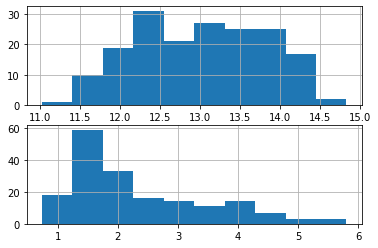

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,(ax1,ax2) = plt.subplots(2,1)
df["Alcohol"].hist(ax=ax1)
df["Malic acid"].hist(ax=ax2)

As we can see in the table above, the features Alcohol (percent/volumne) and Malic acid (g/l) are measured on different scales, so that Feature Scaling is necessary important prior to any comparison or combination of these data.

In [5]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']])

minmax_scale = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']])

In [9]:
print ( f"Mean and standard deviation after standarization: \nMean= {round(df_std[:,0].mean(),2)}, Standar= {df_std[:,0].std()}")
print(f"\nMax value and min_value: \nMax= {df_minmax[:,0].max()}, Min={df_minmax[:,0].min()}")

Mean and standard deviation after standarization: 
Mean= -0.0, Standar= 1.0

Max value and min_value: 
Max= 1.0, Min=0.0


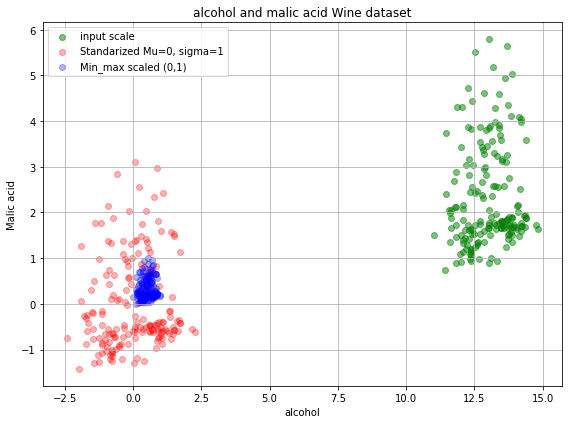

In [10]:
# plotting
def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['Alcohol'], df['Malic acid'], 
                color="green", label="input scale", alpha=0.5)
    plt.scatter(df_std[:,0],df_std[:,1], color="red",
                label="Standarized Mu=0, sigma=1", alpha=0.3)
    plt.scatter(df_minmax[:,0], df_minmax[:,1], color="blue",
                label="Min_max scaled (0,1)", alpha=0.3)
    plt.title("alcohol and malic acid Wine dataset")
    plt.xlabel("alcohol")
    plt.ylabel("Malic acid")
    plt.legend(loc="upper left")
    plt.grid()

    plt.tight_layout()

plot()
plt.show()